In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
videos = pd.read_csv('C:\\Users\\Pratibha Sinha\\Desktop\\project\\Sentiment Analysis\\UScomments.csv', error_bad_lines = False)                #When parser error occurs use end_bad_lines = False
videos.head()

b'Skipping line 41589: expected 4 fields, saw 11\nSkipping line 51628: expected 4 fields, saw 7\nSkipping line 114465: expected 4 fields, saw 5\n'
b'Skipping line 142496: expected 4 fields, saw 8\nSkipping line 189732: expected 4 fields, saw 6\nSkipping line 245218: expected 4 fields, saw 7\n'
b'Skipping line 388430: expected 4 fields, saw 5\n'
C:\Users\Pratibha Sinha\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (2,3) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,video_id,comment_text,likes,replies
0,XpVt6Z1Gjjo,Logan Paul it's yo big day ‼️‼️‼️,4,0
1,XpVt6Z1Gjjo,I've been following you from the start of your...,3,0
2,XpVt6Z1Gjjo,Say hi to Kong and maverick for me,3,0
3,XpVt6Z1Gjjo,MY FAN . attendance,3,0
4,XpVt6Z1Gjjo,trending 😉,3,0


## Sentiment Analysis 

In [3]:
!pip install textblob          

In [4]:
from textblob import TextBlob

In [5]:
TextBlob('Logan Paul its yo big day ‼️‼️‼️').sentiment.polarity

0.0

In [6]:
polarity = []
for i in videos ['comment_text']:
    try:
      polarity.append(TextBlob(i).sentiment.polarity)
    except:
     polarity.append(0)      #handle exception

In [7]:
videos ['polarity'] = polarity

In [10]:
videos.head(10)

,video_id,comment_text,likes,replies,polarity
0,XpVt6Z1Gjjo,Logan Paul it's yo big day ‼️‼️‼️,4,0,0.000000
1,XpVt6Z1Gjjo,I've been following you from the start of your...,3,0,0.000000
2,XpVt6Z1Gjjo,Say hi to Kong and maverick for me,3,0,0.000000
3,XpVt6Z1Gjjo,MY FAN . attendance,3,0,0.000000
4,XpVt6Z1Gjjo,trending 😉,3,0,0.000000
5,XpVt6Z1Gjjo,#1 on trending AYYEEEEE,3,0,0.000000
6,XpVt6Z1Gjjo,The end though 😭👍🏻❤️,4,0,0.000000
7,XpVt6Z1Gjjo,#1 trending!!!!!!!!!,3,0,0.000000
8,XpVt6Z1Gjjo,Happy one year vlogaversary,3,0,0.800000
9,XpVt6Z1Gjjo,You and your shit brother may have single hand...,0,0,-0.135714


## EDA for positive sentiment

In [11]:
comments_positive = videos[videos['polarity']==1]
comments_positive.head()

,video_id,comment_text,likes,replies,polarity
64,XpVt6Z1Gjjo,yu are the best,1,0,1.0
156,cLdxuaxaQwc,Power is the disease. Care is the cure. Keep...,0,0,1.0
227,WYYvHb03Eog,YAS Can't wait to get it! I just need to sell ...,0,0,1.0
307,sjlHnJvXdQs,This is priceless,0,0,1.0
319,sjlHnJvXdQs,Summed up perfectly,0,0,1.0


### Wordcloud Installation and Implement

In [12]:
!pip install wordcloud

In [13]:
from wordcloud import WordCloud, STOPWORDS

In [15]:
total_comments=(' '.join(comments_positive['comment_text']))
len(total_comments)

846560

(-0.5, 999.5, 499.5, -0.5)

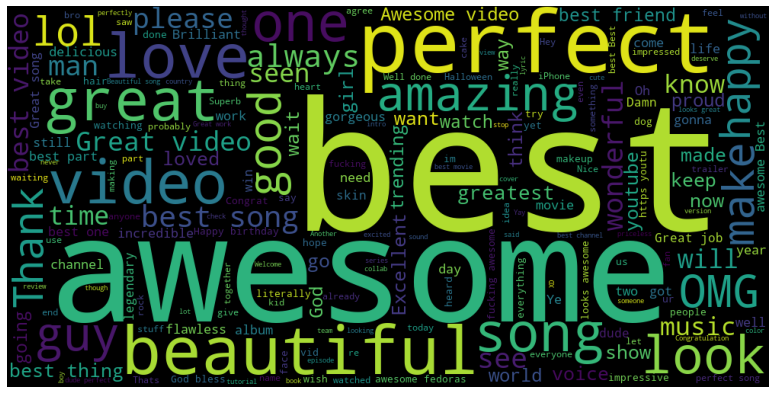

In [28]:
wordcloud=WordCloud(width = 1000, height = 500, stopwords=set(STOPWORDS)).generate(total_comments)
plt.figure(figsize=(18,7))
plt.imshow(wordcloud)
plt.axis('off')

## EDA for negative sentiment 

In [29]:
comments_negative = videos[videos['polarity']==-1]
comments_negative.head()

,video_id,comment_text,likes,replies,polarity
512,8wNr-NQImFg,BEN CARSON IS THE MAN!!!!! THEY HATE HIM CAUSE...,0,0,-1.0
562,8wNr-NQImFg,Well… The brain surgeon Ben Carson just proved...,0,0,-1.0
952,Ayb_2qbZHm4,WHY DID YOU MAKE FURRY FORCE?! SO NASTY!!!,0,0,-1.0
1371,vu_9muoxT50,WTF BRUH!!!!!!,0,0,-1.0
1391,vu_9muoxT50,cheeseus christ thats insane!!!,0,0,-1.0


In [30]:
total_comments=(' '.join(comments_negative['comment_text']))
len(total_comments)

190787

(-0.5, 999.5, 499.5, -0.5)

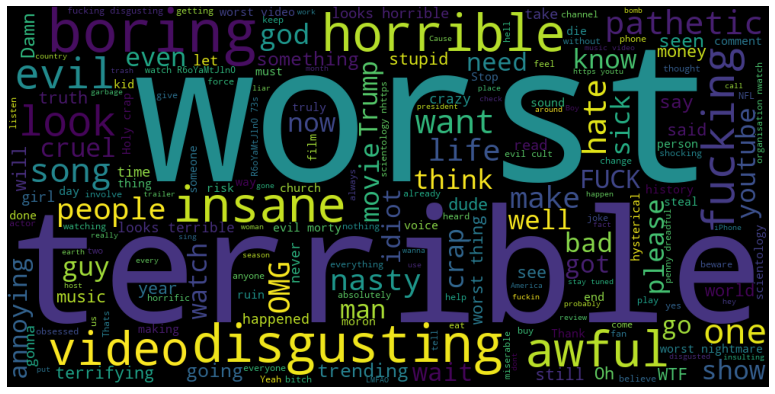

In [31]:
wordcloud=WordCloud(width = 1000, height = 500, stopwords=set(STOPWORDS)).generate(total_comments)
plt.figure(figsize=(18,7))
plt.imshow(wordcloud)
plt.axis('off')